# Vehicle Recalls

In [125]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Path to recalls dataset

In [126]:
recalls_dataset = '../Processed_Data/API/Recalls.pkl'

### Load recalls Data

In [127]:
df_recalls = pd.read_pickle(recalls_dataset)
print(df_recalls.shape)
df_recalls.head()

(45033, 6)


,Component,Make,Manufacturer,Model,ModelYear,ReportReceivedDate
0,EXTERIOR LIGHTING,PONTIAC,SABERSPORT,BONNEVILLE,1999,2009
1,POWER TRAIN:AUTOMATIC TRANSMISSION,PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,1999
2,"FUEL SYSTEM, GASOLINE:DELIVERY",PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,2004
3,WHEELS,PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,1999
4,ELECTRICAL SYSTEM,NABI,"North American Bus Industries, Inc.",LFW,2000,2013


# Components
## Count The Frequency For Each Components

**Each recall may have mulitiple components at same time, we need split them by comma.**

In [128]:
def split_components(series):
 return pd.Series([x for list_ in series for x in list_.split(',')])
split_components(df_recalls['Component'])

0                                   EXTERIOR LIGHTING
1                  POWER TRAIN:AUTOMATIC TRANSMISSION
2                                         FUEL SYSTEM
3                                   GASOLINE:DELIVERY
4                                              WHEELS
                             ...                     
56626    ENGINE AND ENGINE COOLING:COOLING SYSTEM:FAN
56627                             WHEELS:HUBCAP/COVER
56628                                  STRUCTURE:BODY
56629                               STEERING:LINKAGES
56630                          EQUIPMENT:OTHER:LABELS
Length: 56631, dtype: object

**Now we can count the frequency.**

In [129]:
valueCount = split_components(df_recalls['Component'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount.head()

SERVICE BRAKES                            4445
FUEL SYSTEM                               3436
EQUIPMENT                                 3429
EQUIPMENT:RECREATIONAL VEHICLE/TRAILER    1854
 AND FITTINGS                             1563
dtype: int64

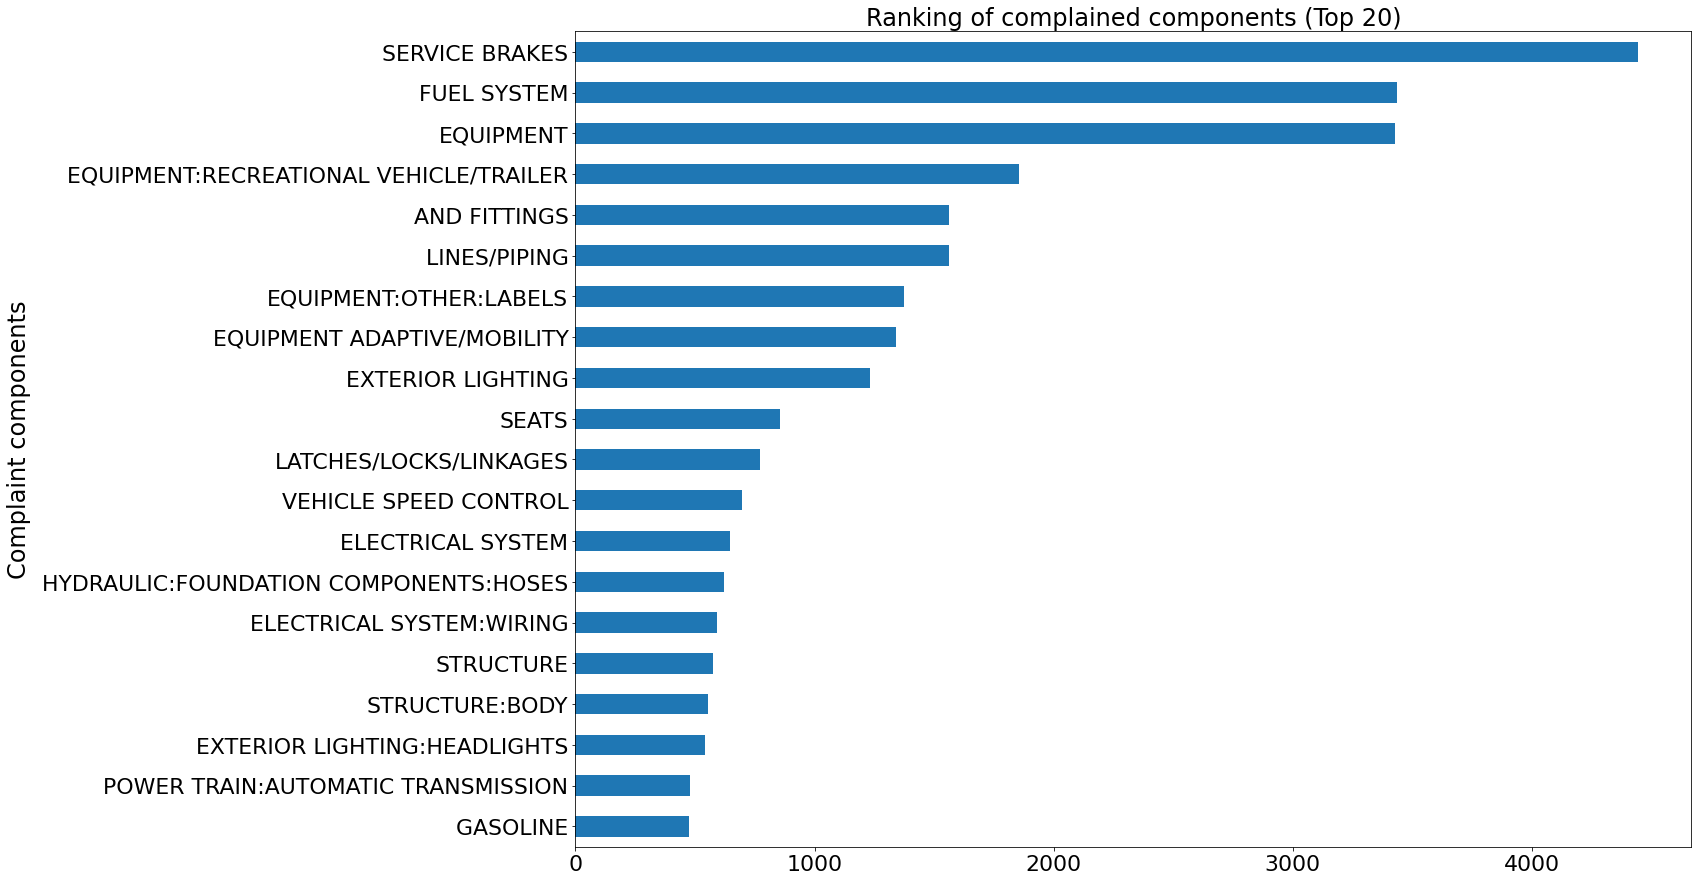

In [130]:
fig = plt.figure(figsize=(20,15))
# set up the bar chart
ax = valueCount.head(20).plot(kind="barh")
plt.title("Ranking of complained components (Top 20)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Recall_components_top20.png', format='png')

# Recall Date between vehicle released
## Calculate the time differences

In [131]:
df_recalls['ReportReceivedDate'] = pd.to_numeric(df_recalls['ReportReceivedDate'], errors='ignore')
df_recalls['ModelYear'] = pd.to_numeric(df_recalls['ModelYear'], errors='ignore')
df_recalls['YearDelta'] = df_recalls['ReportReceivedDate'] - df_recalls['ModelYear']
df_recalls.head()

,Component,Make,Manufacturer,Model,ModelYear,ReportReceivedDate,YearDelta
0,EXTERIOR LIGHTING,PONTIAC,SABERSPORT,BONNEVILLE,1999,2009,10
1,POWER TRAIN:AUTOMATIC TRANSMISSION,PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,1999,0
2,"FUEL SYSTEM, GASOLINE:DELIVERY",PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,2004,5
3,WHEELS,PONTIAC,GENERAL MOTORS CORP.,BONNEVILLE,1999,1999,0
4,ELECTRICAL SYSTEM,NABI,"North American Bus Industries, Inc.",LFW,2000,2013,13


## Draw the average year difference between these makers

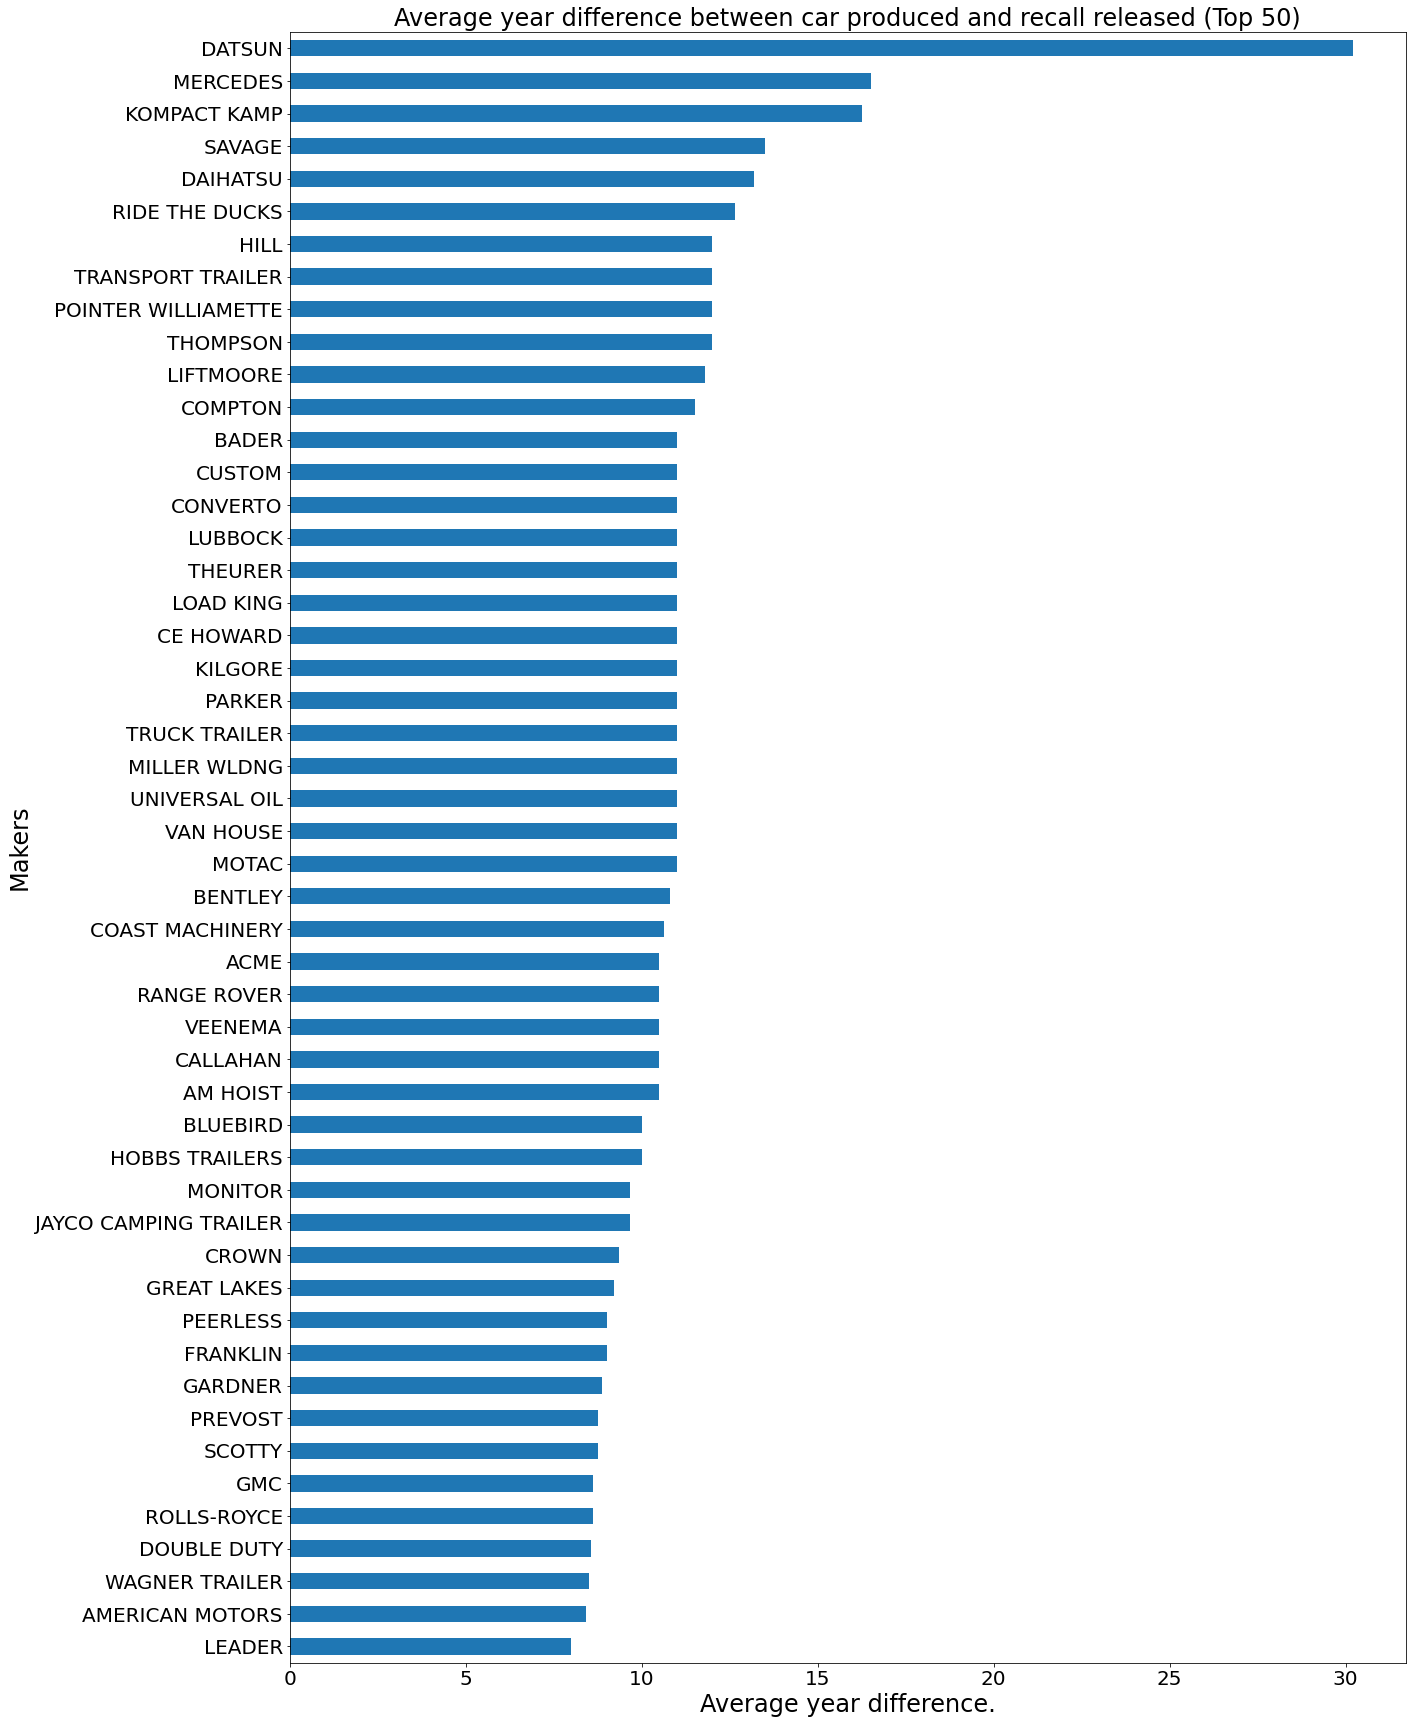

In [132]:
fig = plt.figure(figsize=(20,30))
# set up the bar chart
ax = df_recalls.groupby('Make')['YearDelta'].mean().sort_values(ascending=False).head(50).plot(kind='barh')
plt.title("Average year difference between car produced and recall released (Top 50)", fontsize=24)
plt.xlabel("Average year difference.", fontsize=24)
plt.ylabel("Makers", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Recall_year_differences_top50.png', format='png')

In [133]:
df_recalls[df_recalls['Make']=='MERCEDES'].groupby('Model')['YearDelta'].count()

Model
S CLASS    2
Name: YearDelta, dtype: int64